In [34]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [42]:
df = pd.read_excel("~/Downloads/Powertrust Northeastern Sample File(v2).xlsx")
df.head(5)

,SiteId,SMRId,SMRStartDt,SMREndDt,IsCertified,Token#,Value (KWh),DevName,Capacity (KW),Address,Country,Latitude,Longitude
0,7d0a67a7-3ae6-46e6-8afd-4d3b0835b515,b8381540-b07f-45e8-aa04-54908d112945,NaT,"14 Nov 2023, 10:35:00",True,NaN,0.01,developer 2,17.0,"Pisawan, Village Pisawan, P.O Pisawan, Pargana...",India,27.582796,80.392544
1,7d0a67a7-3ae6-46e6-8afd-4d3b0835b515,c6c97fcc-6a8e-4875-a46a-f03e4600be5d,NaT,"30 Nov 2023, 18:29:00",True,NaN,931.30,developer 2,17.0,"Pisawan, Village Pisawan, P.O Pisawan, Pargana...",India,27.582796,80.392544
2,7d0a67a7-3ae6-46e6-8afd-4d3b0835b515,83b692b0-67f0-44f7-8e3b-c205558ae44f,2022-12-31 18:30:00,"31 Jan 2023, 18:29:59",True,4957.0,982.00,developer 2,17.0,"Pisawan, Village Pisawan, P.O Pisawan, Pargana...",India,27.582796,80.392544
3,7d0a67a7-3ae6-46e6-8afd-4d3b0835b515,852486c5-eb0a-477a-8556-37a525f61124,2023-01-31 18:30:00,"28 Feb 2023, 18:29:59",True,4959.0,1454.20,developer 2,17.0,"Pisawan, Village Pisawan, P.O Pisawan, Pargana...",India,27.582796,80.392544
4,4b21bde7-7111-444c-9ae1-b2bfb739c478,c70bf19e-c07b-44ef-83c3-84992b0732a0,NaT,"30 Nov 2023, 18:29:00",True,NaN,129.00,developer 3,1.0,"Tower Chawk,At Post Boriya,Petlad",India,22.495406,72.890366


In [44]:
df.shape

(5558, 13)

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5558 entries, 0 to 5557
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   SiteId         5558 non-null   object        
 1   SMRId          5558 non-null   object        
 2   SMRStartDt     5188 non-null   datetime64[ns]
 3   SMREndDt       5558 non-null   object        
 4   IsCertified    5558 non-null   bool          
 5   Token#         5196 non-null   float64       
 6   Value (KWh)    5558 non-null   float64       
 7   DevName        5558 non-null   object        
 8   Capacity (KW)  5558 non-null   float64       
 9   Address        5558 non-null   object        
 10  Country        5558 non-null   object        
 11  Latitude       5558 non-null   float64       
 12  Longitude      5558 non-null   float64       
dtypes: bool(1), datetime64[ns](1), float64(5), object(6)
memory usage: 526.6+ KB


In [48]:
df.isnull().sum()

SiteId             0
SMRId              0
SMRStartDt       370
SMREndDt           0
IsCertified        0
Token#           362
Value (KWh)        0
DevName            0
Capacity (KW)      0
Address            0
Country            0
Latitude           0
Longitude          0
dtype: int64

In [50]:
df = df.dropna() 
df.head(5)

,SiteId,SMRId,SMRStartDt,SMREndDt,IsCertified,Token#,Value (KWh),DevName,Capacity (KW),Address,Country,Latitude,Longitude
2,7d0a67a7-3ae6-46e6-8afd-4d3b0835b515,83b692b0-67f0-44f7-8e3b-c205558ae44f,2022-12-31 18:30:00,"31 Jan 2023, 18:29:59",True,4957.0,982.0,developer 2,17.0,"Pisawan, Village Pisawan, P.O Pisawan, Pargana...",India,27.582796,80.392544
3,7d0a67a7-3ae6-46e6-8afd-4d3b0835b515,852486c5-eb0a-477a-8556-37a525f61124,2023-01-31 18:30:00,"28 Feb 2023, 18:29:59",True,4959.0,1454.2,developer 2,17.0,"Pisawan, Village Pisawan, P.O Pisawan, Pargana...",India,27.582796,80.392544
8,4b21bde7-7111-444c-9ae1-b2bfb739c478,a12ee1df-9e3c-4bf5-9a51-67e2f4dfe07b,2022-12-31 18:31:00,"31 Jan 2023, 18:29:59",True,7925.0,134.0,developer 3,1.0,"Tower Chawk,At Post Boriya,Petlad",India,22.495406,72.890366
11,53054bd8-7664-48f3-aa91-e7e7c05ab05f,6c6a437e-1ce9-4afc-a7d9-9c780fb174cb,2022-12-31 18:30:00,"31 Jan 2023, 18:29:59",True,4781.0,1391.9,developer 2,25.5,"Gata No. 575, Village Bansa, Pargana Nawabganj...",India,26.967200,81.345624
12,53054bd8-7664-48f3-aa91-e7e7c05ab05f,e8de56b8-64d5-4735-9009-95ca50e16ca9,2023-01-31 18:30:00,"28 Feb 2023, 18:29:59",True,4778.0,1337.1,developer 2,25.5,"Gata No. 575, Village Bansa, Pargana Nawabganj...",India,26.967200,81.345624


In [52]:
df.isnull().sum()

SiteId           0
SMRId            0
SMRStartDt       0
SMREndDt         0
IsCertified      0
Token#           0
Value (KWh)      0
DevName          0
Capacity (KW)    0
Address          0
Country          0
Latitude         0
Longitude        0
dtype: int64

In [54]:
df["Month"] = df["SMRStartDt"].dt.month
df.head(5)

,SiteId,SMRId,SMRStartDt,SMREndDt,IsCertified,Token#,Value (KWh),DevName,Capacity (KW),Address,Country,Latitude,Longitude,Month
2,7d0a67a7-3ae6-46e6-8afd-4d3b0835b515,83b692b0-67f0-44f7-8e3b-c205558ae44f,2022-12-31 18:30:00,"31 Jan 2023, 18:29:59",True,4957.0,982.0,developer 2,17.0,"Pisawan, Village Pisawan, P.O Pisawan, Pargana...",India,27.582796,80.392544,12
3,7d0a67a7-3ae6-46e6-8afd-4d3b0835b515,852486c5-eb0a-477a-8556-37a525f61124,2023-01-31 18:30:00,"28 Feb 2023, 18:29:59",True,4959.0,1454.2,developer 2,17.0,"Pisawan, Village Pisawan, P.O Pisawan, Pargana...",India,27.582796,80.392544,1
8,4b21bde7-7111-444c-9ae1-b2bfb739c478,a12ee1df-9e3c-4bf5-9a51-67e2f4dfe07b,2022-12-31 18:31:00,"31 Jan 2023, 18:29:59",True,7925.0,134.0,developer 3,1.0,"Tower Chawk,At Post Boriya,Petlad",India,22.495406,72.890366,12
11,53054bd8-7664-48f3-aa91-e7e7c05ab05f,6c6a437e-1ce9-4afc-a7d9-9c780fb174cb,2022-12-31 18:30:00,"31 Jan 2023, 18:29:59",True,4781.0,1391.9,developer 2,25.5,"Gata No. 575, Village Bansa, Pargana Nawabganj...",India,26.967200,81.345624,12
12,53054bd8-7664-48f3-aa91-e7e7c05ab05f,e8de56b8-64d5-4735-9009-95ca50e16ca9,2023-01-31 18:30:00,"28 Feb 2023, 18:29:59",True,4778.0,1337.1,developer 2,25.5,"Gata No. 575, Village Bansa, Pargana Nawabganj...",India,26.967200,81.345624,1


In [94]:
def Season(x):
    if x.Month in [3, 4, 5]: 
        Season = 'Spring' 
    elif x.Month in [6, 7, 8]:
        Season = 'Summer'
    elif x.Month in [9, 10, 11]:
        Season = 'Autumn'
    else :
        Season = 'Winter'

    return Season 

df['Season'] = df.apply(lambda x: Season(x), axis = 1)
df.head(5)
# a = df[df['Season'] == 'Spring']
# a

,SiteId,SMRId,SMRStartDt,SMREndDt,IsCertified,Token#,Value (KWh),DevName,Capacity (KW),Address,Country,Latitude,Longitude,Month,Season
2,7d0a67a7-3ae6-46e6-8afd-4d3b0835b515,83b692b0-67f0-44f7-8e3b-c205558ae44f,2022-12-31 18:30:00,"31 Jan 2023, 18:29:59",True,4957.0,982.0,developer 2,17.0,"Pisawan, Village Pisawan, P.O Pisawan, Pargana...",India,27.582796,80.392544,12,Winter
3,7d0a67a7-3ae6-46e6-8afd-4d3b0835b515,852486c5-eb0a-477a-8556-37a525f61124,2023-01-31 18:30:00,"28 Feb 2023, 18:29:59",True,4959.0,1454.2,developer 2,17.0,"Pisawan, Village Pisawan, P.O Pisawan, Pargana...",India,27.582796,80.392544,1,Winter
8,4b21bde7-7111-444c-9ae1-b2bfb739c478,a12ee1df-9e3c-4bf5-9a51-67e2f4dfe07b,2022-12-31 18:31:00,"31 Jan 2023, 18:29:59",True,7925.0,134.0,developer 3,1.0,"Tower Chawk,At Post Boriya,Petlad",India,22.495406,72.890366,12,Winter
11,53054bd8-7664-48f3-aa91-e7e7c05ab05f,6c6a437e-1ce9-4afc-a7d9-9c780fb174cb,2022-12-31 18:30:00,"31 Jan 2023, 18:29:59",True,4781.0,1391.9,developer 2,25.5,"Gata No. 575, Village Bansa, Pargana Nawabganj...",India,26.967200,81.345624,12,Winter
12,53054bd8-7664-48f3-aa91-e7e7c05ab05f,e8de56b8-64d5-4735-9009-95ca50e16ca9,2023-01-31 18:30:00,"28 Feb 2023, 18:29:59",True,4778.0,1337.1,developer 2,25.5,"Gata No. 575, Village Bansa, Pargana Nawabganj...",India,26.967200,81.345624,1,Winter


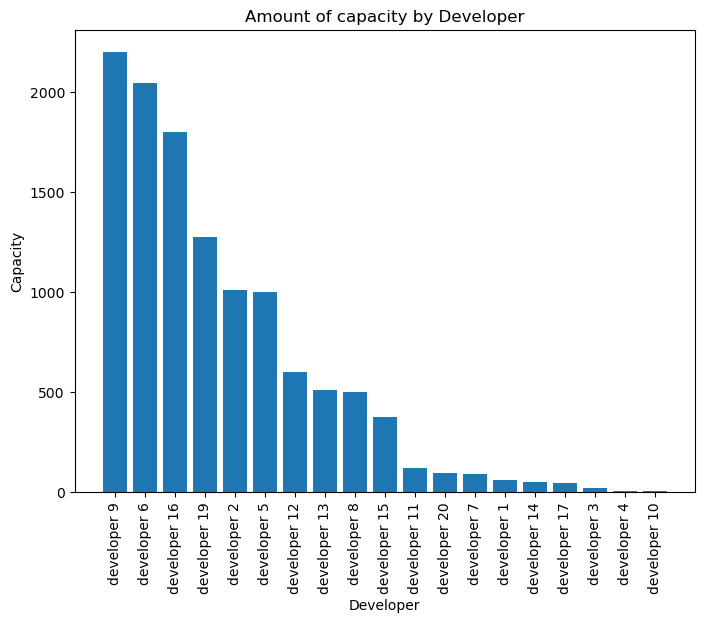

In [112]:
# Sort the DataFrame by 'Capacity (KW)' in decreasing order
df_sorted = df.sort_values(by='Capacity (KW)', ascending=False)

# Create the bar plot with the sorted DataFrame
fig, ax = plt.subplots(figsize=(8,6))

ax.bar(df_sorted.DevName, df_sorted['Capacity (KW)'])

# Set the labels and title
ax.set_xlabel('Developer')
ax.set_ylabel('Capacity')
ax.set_title('Amount of capacity by Developer')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=90)

plt.show()

In [118]:
df['Value (KWh)'].corr(df['Capacity (KW)'])


0.6819102360015026

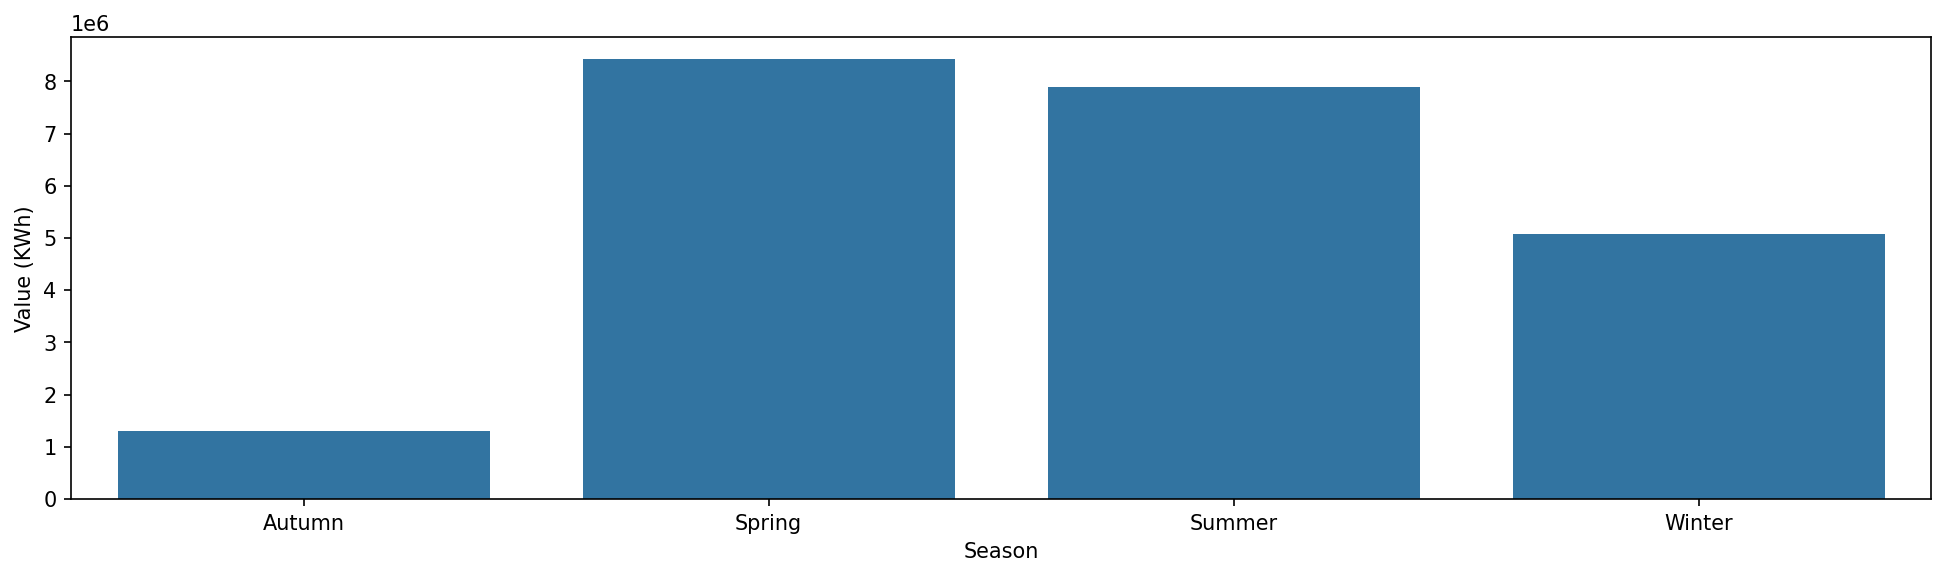

In [142]:
Season = df.groupby("Season").sum(numeric_only=True).reset_index()
plt.figure(figsize = (16,4), dpi=150)
sns.barplot(x = "Season", y = "Value (KWh)", data = Season)
plt.xticks();

<Axes: xlabel='Season', ylabel='Capacity (KW)'>

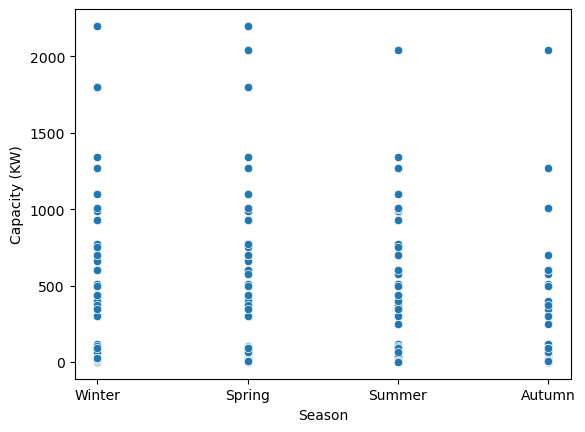

In [126]:
sns.scatterplot(x = "Season" ,y = "Capacity (KW)" ,data = df)


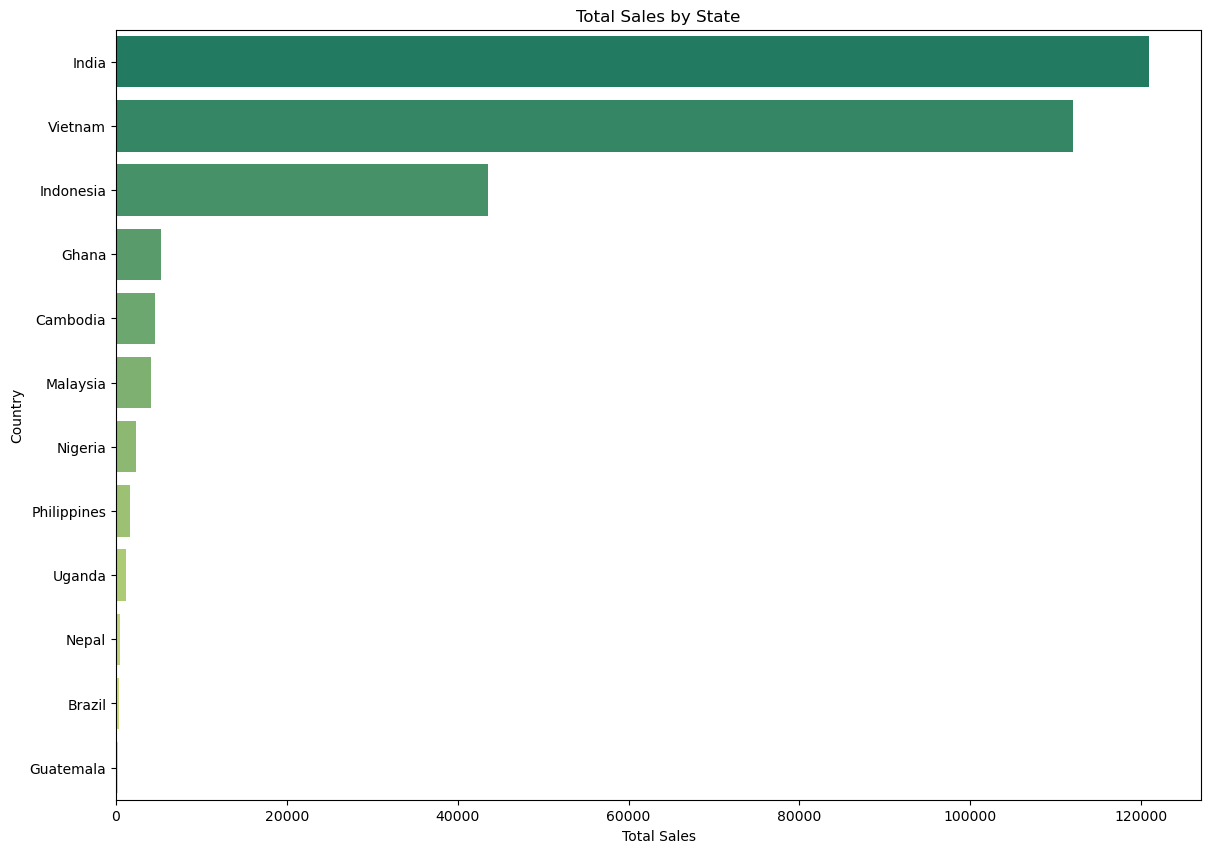

In [152]:
figure = plt.figure(figsize=(14,10))

grouped_df = df.groupby('Country').sum(numeric_only=True)[['Capacity (KW)']].reset_index().sort_values(by = 'Capacity (KW)', ascending = False)
g = sns.barplot(x = 'Capacity (KW)', y = 'Country', data = grouped_df, hue = 'Country', palette = 'summer', legend = False)
g.set_title('Total Sales by State')
g.set_xlabel('Total Sales')
plt.show(g)